# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

## List of libraries

In [87]:
#Your code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
# #solution
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns
# sns.set_style('darkgrid')

# from statsmodels.formula.api import ols
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import statsmodels.api as sm
# import scipy.stats as stats
# from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('Lego_dataset_cleaned.csv')

## Renaming columns

In [20]:
for col in df.columns:
    print(col)

piece_count
list_price
num_reviews
play_star_rating
star_rating
val_star_rating
ages_10+
ages_10-14
ages_10-16
ages_10-21
ages_11-16
ages_12+
ages_12-16
ages_14+
ages_16+
ages_1½-3
ages_1½-5
ages_2-5
ages_4+
ages_4-7
ages_4-99
ages_5+
ages_5-12
ages_5-8
ages_6+
ages_6-12
ages_6-14
ages_7+
ages_7-12
ages_7-14
ages_8+
ages_8-12
ages_8-14
ages_9+
ages_9-12
ages_9-14
ages_9-16
theme_name_Angry Birds™
theme_name_Architecture
theme_name_BOOST
theme_name_Blue's Helicopter Pursuit
theme_name_BrickHeadz
theme_name_Carnotaurus Gyrosphere Escape
theme_name_City
theme_name_Classic
theme_name_Creator 3-in-1
theme_name_Creator Expert
theme_name_DC Comics™ Super Heroes
theme_name_DC Super Hero Girls
theme_name_DIMENSIONS™
theme_name_DUPLO®
theme_name_Dilophosaurus Outpost Attack
theme_name_Disney™
theme_name_Elves
theme_name_Friends
theme_name_Ghostbusters™
theme_name_Ideas
theme_name_Indoraptor Rampage at Lockwood Estate
theme_name_Juniors
theme_name_Jurassic Park Velociraptor Chase
theme_name_MINDS

In [32]:
subs= [('½','half'),('™', ''),('®',''),('+','plus'),
         (' ','_'),("'",""),(".",""),('-',"_")]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [33]:
df.columns = [col_formatting(col) for col in df.columns]

In [34]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

## Define target and predictors/ train, test set

In [53]:
#Your code here - Define the target and predictors
y = 'list_price'
Xs = list(df.columns)
Xs.remove(y)
train, test = train_test_split(df)

In [ ]:
# #solution
# #Defining the problem
# outcome = 'list_price'
# x_cols = list(df.columns)
# x_cols.remove(outcome)

In [95]:
print(len(train),len(test))

8152 2718


In [55]:
#Your code here - Fit the actual model
predictors ='+'.join(Xs)
formula =y+'~'+ predictors

model = ols(formula = formula , data =train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     534.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:50:13   Log-Likelihood:                -40613.
No. Observations:                8152   AIC:                         8.142e+04
Df Residuals:                    8057   BIC:                         8.208e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.6300      1.734     37.264      0.000      61.230      68.030
piece_count                                         77.0275      0.902     85.433      0.000      75.260      78.795
num_reviews                                          6.5506      0.679      9.650      0.000       5.220       7.881
play_star_rating                                     5.3842      0.640      8.415      0.000       4.130       6.638
star_rating                                         -1.2485      0.722     -1.729      0.084      -2.664       0.167
val_star_rating                                     -8.4919      0.642    -13.219      0.000      -9.751      -7.233
ages_10plus                                        127.7027      6.806     18.764      0.000     114.362     141.044
ages_10_14                                         -20.2245      9.286     -2.178      0.029     -38.428      -2.022
ages_10_16                                         -10.3862      4.040     -2.571      0.010     -18.306      -2.466
ages_10_21                                          43.6371      7.673      5.687      0.000      28.596      58.679
ages_11_16                                         -18.1185      5.947     -3.047      0.002     -29.776      -6.461
ages_12plus                                         70.4393      5.628     12.515      0.000      59.406      81.472
ages_12_16                                         -61.5121      6.674     -9.217      0.000     -74.594     -48.430
ages_14plus                                         19.1422      4.123      4.642      0.000      11.059      27.225
ages_16plus                                         22.6753      5.975      3.795      0.000      10.963      34.387
ages_1half_3                                        -8.7120      2.452     -3.553      0.000     -13.519      -3.905
ages_1half_5                                        -3.1233      3.047     -1.025      0.305      -9.097       2.850
ages_2_5                                            14.8646      1.697      8.757      0.000      11.537      18.192
ages_4plus                                         -18.3393      5.812     -3.155      0.002     -29.732      -6.947
ages_4_7                                            -5.3013      3.460     -1.532      0.126     -12.084       1.481
ages_4_99                                           -2.8031      3.402     -0.824      0.410      -9.473       3.867
ages_5plus                                          -8.9977      3.348     -2.687      0.007     -15.561      -2.434
ages_5_12                                          -31.9501      3.120    -10.240      0.000     -38.066     -25.834
ages_5_8                                 

In [96]:
# #solution
# #Fitting the actual model
# predictors = '+'.join(x_cols)
# formula = outcome + "~" + predictors
# model = ols(formula=formula, data=train).fit()
# model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     534.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:11:14   Log-Likelihood:                -40613.
No. Observations:                8152   AIC:                         8.142e+04
Df Residuals:                    8057   BIC:                         8.208e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.6300      1.734     37.264      0.000      61.230      68.030
piece_count                                         77.0275      0.902     85.433      0.000      75.260      78.795
num_reviews                                          6.5506      0.679      9.650      0.000       5.220       7.881
play_star_rating                                     5.3842      0.640      8.415      0.000       4.130       6.638
star_rating                                         -1.2485      0.722     -1.729      0.084      -2.664       0.167
val_star_rating                                     -8.4919      0.642    -13.219      0.000      -9.751      -7.233
ages_10plus                                        127.7027      6.806     18.764      0.000     114.362     141.044
ages_10_14                                         -20.2245      9.286     -2.178      0.029     -38.428      -2.022
ages_10_16                                         -10.3862      4.040     -2.571      0.010     -18.306      -2.466
ages_10_21                                          43.6371      7.673      5.687      0.000      28.596      58.679
ages_11_16                                         -18.1185      5.947     -3.047      0.002     -29.776      -6.461
ages_12plus                                         70.4393      5.628     12.515      0.000      59.406      81.472
ages_12_16                                         -61.5121      6.674     -9.217      0.000     -74.594     -48.430
ages_14plus                                         19.1422      4.123      4.642      0.000      11.059      27.225
ages_16plus                                         22.6753      5.975      3.795      0.000      10.963      34.387
ages_1half_3                                        -8.7120      2.452     -3.553      0.000     -13.519      -3.905
ages_1half_5                                        -3.1233      3.047     -1.025      0.305      -9.097       2.850
ages_2_5                                            14.8646      1.697      8.757      0.000      11.537      18.192
ages_4plus                                         -18.3393      5.812     -3.155      0.002     -29.732      -6.947
ages_4_7                                            -5.3013      3.460     -1.532      0.126     -12.084       1.481
ages_4_99                                           -2.8031      3.402     -0.824      0.410      -9.473       3.867
ages_5plus                                          -8.9977      3.348     -2.687      0.007     -15.561      -2.434
ages_5_12                                          -31.9501      3.120    -10.240      0.000     -38.066     -25.834
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [67]:
#Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] =p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)#Null: coeff of X = 0
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 68
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.6300,1.734,37.264,0.000,61.230,68.030
piece_count,77.0275,0.902,85.433,0.000,75.260,78.795
num_reviews,6.5506,0.679,9.650,0.000,5.220,7.881
play_star_rating,5.3842,0.640,8.415,0.000,4.130,6.638
star_rating,-1.2485,0.722,-1.729,0.084,-2.664,0.167


In [97]:
# #solution
# #Extract the p-value table from the summary and use it to subset our features
# summary = model.summary()
# p_table = summary.tables[1]
# p_table = pd.DataFrame(p_table.data)
# p_table.columns = p_table.iloc[0]
# p_table = p_table.drop(0)
# p_table = p_table.set_index(p_table.columns[0])
# p_table['P>|t|'] = p_table['P>|t|'].astype(float)
# x_cols = list(p_table[p_table['P>|t|']<0.05].index)
# x_cols.remove('Intercept')
# print(len(p_table), len(x_cols))
# print(x_cols[:5])
# p_table.head()

103 68
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.6300,1.734,37.264,0.000,61.230,68.030
piece_count,77.0275,0.902,85.433,0.000,75.260,78.795
num_reviews,6.5506,0.679,9.650,0.000,5.220,7.881
play_star_rating,5.3842,0.640,8.415,0.000,4.130,6.638
star_rating,-1.2485,0.722,-1.729,0.084,-2.664,0.167


In [68]:
#Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = y+'~'+predictors
model = ols(formula = formula, data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     750.2
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:04:30   Log-Likelihood:                -40625.
No. Observations:                8152   AIC:                         8.139e+04
Df Residuals:                    8084   BIC:                         8.186e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.6182      1.533     41.503      0.000      60.613      66.623
piece_count                                         76.9814      0.880     87.441      0.000      75.256      78.707
num_reviews                                          6.6179      0.667      9.929      0.000       5.311       7.924
play_star_rating                                     4.9163      0.538      9.138      0.000       3.862       5.971
val_star_rating                                     -9.0048      0.502    -17.927      0.000      -9.989      -8.020
ages_10plus                                        128.5895      4.807     26.753      0.000     119.167     138.012
ages_10_14                                         -16.9226      9.651     -1.754      0.080     -35.840       1.995
ages_10_16                                          -6.8701      3.853     -1.783      0.075     -14.422       0.682
ages_10_21                                          43.6182      3.332     13.091      0.000      37.087      50.150
ages_11_16                                         -14.1211      5.794     -2.437      0.015     -25.478      -2.764
ages_12plus                                         73.1980      6.183     11.839      0.000      61.078      85.318
ages_12_16                                         -57.7250      7.022     -8.221      0.000     -71.490     -43.960
ages_14plus                                         22.3444      4.783      4.672      0.000      12.969      31.720
ages_16plus                                         25.4705      6.703      3.800      0.000      12.331      38.610
ages_1half_3                                        -1.2837      3.151     -0.407      0.684      -7.461       4.893
ages_2_5                                            21.7764      1.988     10.952      0.000      17.879      25.674
ages_4plus                                         -17.5244      8.890     -1.971      0.049     -34.951      -0.098
ages_5plus                                          -7.7574      3.311     -2.343      0.019     -14.247      -1.268
ages_5_12                                          -27.6118      2.680    -10.302      0.000     -32.866     -22.358
ages_6plus                                         -21.4327      5.304     -4.041      0.000     -31.830     -11.035
ages_6_12                                          -14.9172      1.887     -7.903      0.000     -18.617     -11.217
ages_7_12                                          -14.4931      2.215     -6.544      0.000     -18.834     -10.152
ages_7_14                                          -10.7479      1.984     -5.418      0.000     -14.636      -6.860
ages_8plus                               

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [85]:
#Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])

p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_col = list(p_table[p_table['P>|t|']<0.05].index)
x_col.remove('Intercept')

predictors = '+'.join(x_col)
formula = y+'~'+ predictors
model = ols(formula = formula, data = train).fit()
print(len(p_table), len(x_col))
model.summary()

66 64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     797.3
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:25:16   Log-Likelihood:                -40628.
No. Observations:                8152   AIC:                         8.138e+04
Df Residuals:                    8088   BIC:                         8.183e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           61.9834      1.284     48.269      0.000      59.466      64.501
piece_count                                         76.4998      0.841     90.957      0.000      74.851      78.148
num_reviews                                          6.6078      0.665      9.943      0.000       5.305       7.911
play_star_rating                                     5.0797      0.533      9.535      0.000       4.035       6.124
val_star_rating                                     -9.0980      0.498    -18.262      0.000     -10.075      -8.121
ages_10plus                                        131.4664      4.661     28.203      0.000     122.329     140.604
ages_10_21                                          44.9805      3.250     13.838      0.000      38.609      51.352
ages_11_16                                         -10.2048      5.547     -1.840      0.066     -21.079       0.669
ages_12plus                                         77.6128      5.901     13.153      0.000      66.045      89.180
ages_12_16                                         -52.8313      6.712     -7.871      0.000     -65.989     -39.673
ages_14plus                                         27.4867      4.296      6.397      0.000      19.064      35.909
ages_16plus                                         31.8729      6.133      5.197      0.000      19.851      43.895
ages_2_5                                            23.2749      1.830     12.719      0.000      19.688      26.862
ages_4plus                                         -17.6250      8.888     -1.983      0.047     -35.049      -0.201
ages_5plus                                          -7.0938      3.291     -2.156      0.031     -13.544      -0.643
ages_5_12                                          -25.9593      2.556    -10.156      0.000     -30.970     -20.949
ages_6plus                                         -19.6185      5.236     -3.747      0.000     -29.882      -9.355
ages_6_12                                          -12.6320      1.594     -7.926      0.000     -15.756      -9.508
ages_7_12                                          -12.1999      1.970     -6.194      0.000     -16.061      -8.339
ages_7_14                                           -8.5954      1.730     -4.969      0.000     -11.986      -5.204
ages_8plus                                          15.2852      4.635      3.298      0.001       6.200      24.371
ages_8_12                                          -11.3271      2.550     -4.441      0.000     -16.327      -6.328
ages_8_14                                           -7.2109      1.690     -4.267      0.000     -10.524      -3.898
ages_9plus                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [98]:
#Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\woogu\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.63692623168335),
 ('num_reviews', 2.9017032356329078),
 ('play_star_rating', 1.7968177169362451),
 ('val_star_rating', 1.6097525988114958),
 ('ages_10plus', 7.228951141740627),
 ('ages_10_14', 1.1032682813263521),
 ('ages_10_16', 1.187708597395657),
 ('ages_10_21', 1.0628614103895877),
 ('ages_11_16', 1.1667183049870646),
 ('ages_12plus', 6.294714956011935),
 ('ages_12_16', 1.2076607293746886),
 ('ages_14plus', 2.2715438894179854),
 ('ages_16plus', 9.661608905519861),
 ('ages_1half_3', 1.0599862784245),
 ('ages_2_5', 1.2318895602644944),
 ('ages_4plus', 1.1981056444590286),
 ('ages_5plus', inf),
 ('ages_5_12', 3.2528023189543007),
 ('ages_6plus', 2.671488210440779),
 ('ages_6_12', 1.9836515947908795),
 ('ages_7_12', 1.5196536293240146),
 ('ages_7_14', 2.002680140694711),
 ('ages_8plus', 2.5884617884375585),
 ('ages_8_12', 1.2950139613732123),
 ('ages_8_14', 2.094993038747884),
 ('ages_9plus', 1.4106033503770399),
 ('ages_9_12', 1.0212809433780137),
 ('ages_9_14', 1.9

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [99]:
#Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols,vif))
x_cols = [x for x,vif in vif_scores if vif<5]
print(len(vif_scores), len(x_cols))

68 61


In [100]:
predictors = '+'.join(x_cols)
formula = y +'~'+ predictors
model = ols(formula = formula, data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     734.8
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:01   Log-Likelihood:                -41026.
No. Observations:                8152   AIC:                         8.218e+04
Df Residuals:                    8090   BIC:                         8.261e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.8110      1.246     52.839      0.000      63.369      68.252
piece_count                                         77.4392      0.706    109.680      0.000      76.055      78.823
num_reviews                                          4.3812      0.648      6.760      0.000       3.111       5.652
play_star_rating                                     5.9493      0.507     11.733      0.000       4.955       6.943
val_star_rating                                    -10.7386      0.504    -21.296      0.000     -11.727      -9.750
ages_10_14                                         -36.8594     10.027     -3.676      0.000     -56.514     -17.205
ages_10_16                                         -14.6299      3.725     -3.927      0.000     -21.932      -7.327
ages_10_21                                          40.2432      3.408     11.810      0.000      33.563      46.923
ages_11_16                                         -23.3362      5.661     -4.122      0.000     -34.433     -12.240
ages_12_16                                         -68.6657      6.801    -10.097      0.000     -81.997     -55.334
ages_14plus                                          2.5723      4.025      0.639      0.523      -5.318      10.463
ages_1half_3                                        -3.8052      3.175     -1.199      0.231     -10.028       2.418
ages_2_5                                            18.9370      1.895      9.995      0.000      15.223      22.651
ages_4plus                                          -5.2864      9.268     -0.570      0.568     -23.454      12.881
ages_5_12                                          -31.9296      2.679    -11.921      0.000     -37.180     -26.679
ages_6plus                                         -26.0449      5.493     -4.742      0.000     -36.812     -15.278
ages_6_12                                          -20.8380      1.729    -12.052      0.000     -24.227     -17.449
ages_7_12                                          -19.2202      2.118     -9.073      0.000     -23.373     -15.067
ages_7_14                                          -15.8316      1.877     -8.436      0.000     -19.510     -12.153
ages_8plus                                           1.0731      4.777      0.225      0.822      -8.290      10.437
ages_8_12                                          -18.9438      2.683     -7.060      0.000     -24.204     -13.684
ages_8_14                                          -17.4454      1.969     -8.862      0.000     -21.304     -13.586
ages_9plus                                          19.2768      9.715      1.984      0.047       0.232      38.321
ages_9_12                                

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

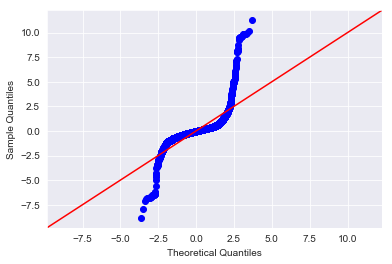

In [101]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line = '45', fit = True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

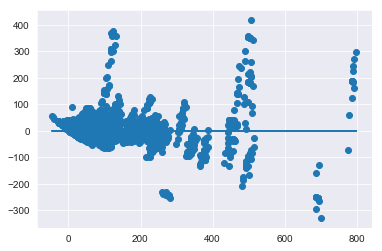

In [104]:
#Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]),[0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

0.8 percentile:4.447203233446613
0.81 percentile:4.512971560274537
0.82 percentile:4.542526402035123
0.83 percentile:4.580752485605895
0.84 percentile:4.640913706863106
0.85 percentile:4.6985494117910225
0.86 percentile:4.718373863481943
0.87 percentile:4.787408405976297
0.88 percentile:4.8039210397329235
0.89 percentile:4.826327766567244
0.9 percentile:4.89924031131419
0.91 percentile:4.976713742220571
0.92 percentile:5.0490223265009595
0.93 percentile:5.140421850231899
0.94 percentile:5.209419483952433
0.95 percentile:5.292263579298989
0.96 percentile:5.391752152536553
0.97 percentile:5.528952783620542
0.98 percentile:5.678340376637527
0.99 percentile:5.873347331375852


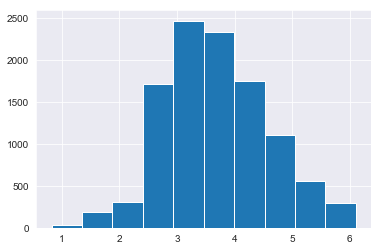

In [112]:
#Your code here - Check for outliers
for i in range(80,100):
    q = i/100
    print(f"{q} percentile:{df.list_price.quantile(q=q)}")
df.list_price.hist()    

In [107]:
#Your code here - Rerun the model with extreme outliers removed
org_tot = len(df)
df= df[df.list_price<450]#Subsetting to remove extreme outliers
print('Percent removed:',(org_tot-len(df))/org_tot)
df.list_price = df.list_price.map(np.log)#log transformation
train, test = train_test_split(df)

predictors = '+'.join(x_cols)
formula = y +'~' + predictors
model = ols(formula = formula, data = train).fit()
model.summary()

Percent removed: 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     446.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:33:16   Log-Likelihood:                -4644.0
No. Observations:                8067   AIC:                             9412.
Df Residuals:                    8005   BIC:                             9846.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.3652      0.015    230.483      0.000       3.337       3.394
piece_count                                          0.5861      0.010     59.288      0.000       0.567       0.605
num_reviews                                          0.0208      0.008      2.627      0.009       0.005       0.036
play_star_rating                                     0.0860      0.006     14.729      0.000       0.075       0.097
val_star_rating                                     -0.1394      0.006    -23.660      0.000      -0.151      -0.128
ages_10_14                                           0.4345      0.116      3.738      0.000       0.207       0.662
ages_10_16                                           0.6575      0.044     14.884      0.000       0.571       0.744
ages_10_21                                           0.6629      0.040     16.392      0.000       0.584       0.742
ages_11_16                                           0.3606      0.068      5.324      0.000       0.228       0.493
ages_12_16                                          -0.0217      0.089     -0.244      0.807      -0.197       0.153
ages_14plus                                          0.3823      0.050      7.629      0.000       0.284       0.481
ages_1half_3                                        -0.3938      0.037    -10.728      0.000      -0.466      -0.322
ages_2_5                                             0.5141      0.022     23.237      0.000       0.471       0.558
ages_4plus                                          -1.4811      0.110    -13.452      0.000      -1.697      -1.265
ages_5_12                                           -0.7073      0.032    -22.434      0.000      -0.769      -0.646
ages_6plus                                          -0.9090      0.067    -13.562      0.000      -1.040      -0.778
ages_6_12                                           -0.0914      0.020     -4.564      0.000      -0.131      -0.052
ages_7_12                                            0.1591      0.025      6.324      0.000       0.110       0.208
ages_7_14                                            0.0558      0.022      2.542      0.011       0.013       0.099
ages_8plus                                           0.5755      0.051     11.213      0.000       0.475       0.676
ages_8_12                                            0.3330      0.031     10.770      0.000       0.272       0.394
ages_8_14                                            0.4229      0.023     18.542      0.000       0.378       0.468
ages_9plus                                           0.2814      0.128      2.196      0.028       0.030       0.533
ages_9_12                                

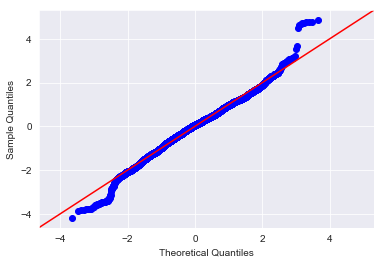

In [109]:
#Your code here - Check normality and homoscedasticity assumptions
fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line='45', fit=True)

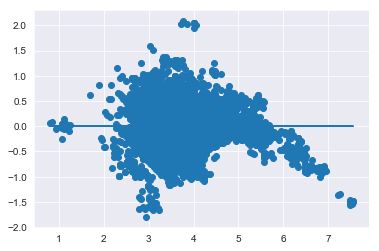

In [110]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]),[0 for i in range(len(train))])

## Alternative approach: Building a model from the ground up

In [114]:
# An Alternative Approach: Building a Model From the Ground Up
x_cols = ['piece_count', 'country_US']
#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     4511.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:39:39   Log-Likelihood:                -7590.7
No. Observations:                8067   AIC:                         1.519e+04
Df Residuals:                    8064   BIC:                         1.521e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7314      0.007    522.371      0.000       3.717       3.745
piece_count     0.7481      0.008     94.288      0.000       0.733       0.764
country_US     -0.2641      0.028     -9.383      0.000      -0.319      -0.209
==============================================================================
Omnibus:                      435.771   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.728
Skew:                          -0.507   Prob(JB):                    1.95e-129
Kurtosis:                       3.858   Cond. No.                         4.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

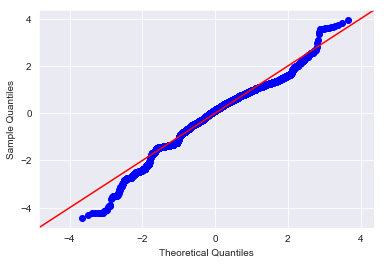

In [115]:
# Checking Assumptions for Simplified Model
# Check Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

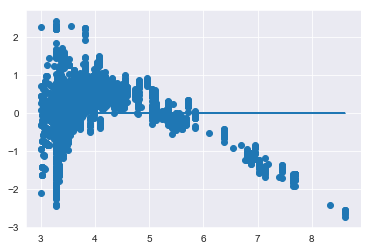

In [116]:
# Check Homoscedasticity Assumption
# Comment: Certainly not as strong a model, but with only 2 features, 
# over half the model performance was recovered.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 